In [63]:
import boto3
import s3transfer
import base64
import re
import time
import json
import requests
import os
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO
import logging
from colorama import Fore, Style, init

In [64]:
# Set up logger
logger = logging.getLogger("fancy_logger")
logger.setLevel(logging.DEBUG)

ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)

logger.addHandler(ch)

In [65]:
logger.info("🚀 Initializing Bedrock client...")
bedrock = boto3.client("bedrock-runtime", region_name="us-east-1")
logger.info("✅ Bedrock client initialized.")

INFO: 🚀 Initializing Bedrock client...
INFO: 🚀 Initializing Bedrock client...
INFO: 🚀 Initializing Bedrock client...
INFO: 🚀 Initializing Bedrock client...
INFO: 🚀 Initializing Bedrock client...
🚀 Initializing Bedrock client...
INFO: ✅ Bedrock client initialized.
INFO: ✅ Bedrock client initialized.
INFO: ✅ Bedrock client initialized.
INFO: ✅ Bedrock client initialized.
INFO: ✅ Bedrock client initialized.
✅ Bedrock client initialized.


In [66]:
prompt="""
    You are an expert HTML and JavaScript developer. I have a image that represents my design, and I need an exact HTML structure using Tailwind CSS without altering the layout or style and color profiles. And it is your responsibility to make sure that the HTML structure is responsive and works on all devices. The image is in the same directory as this script. The image name is 10-510.png. Please provide me with the HTML structure and the necessary script src links for Chart.js and Tailwind CSS.
    include necessary script src  <script src="https://cdn.jsdelivr.net/npm/chart.js"></script>.<script src="https://cdn.tailwindcss.com"></script>
    And Make it also functtional with Chart.js and Tailwind CSS. And make sure to include the necessary script src links for Chart.js and Tailwind CSS.

    Note: The image is a design of a dashboard. Please make sure that the HTML structure is responsive and works on all devices.
    The image is in the same directory as this script.
    And dont Leave any data or inforation in the image. Just provide me with the HTML structure and the necessary script src links for Chart.js and Tailwind CSS.
    Dont leave lineitems in the tables all elments should be in the table.

    Instructions:
    Your code will be evaluated by a human. Please make sure that your code is correct and follows the instructions.
    So think twice before you write the code.
    Use https://placehold.co/ for images
    """

In [67]:
url = "https://figma-alpha-api.s3.us-west-2.amazonaws.com/images/9102c9c2-64d2-403f-97a1-ff660535a3bb"

In [68]:
# Fetch image from the URL
response = requests.get(url)
response.raise_for_status()  # raise error if download fails

# Read image into PIL
image = Image.open(BytesIO(response.content))

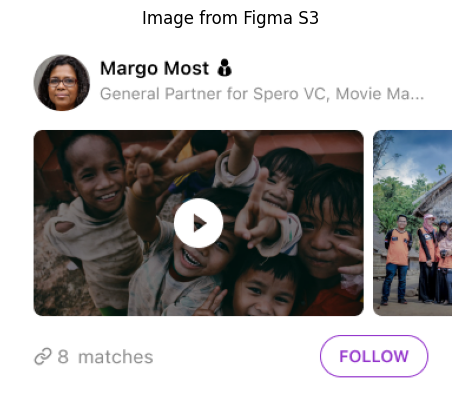

In [69]:
# Display the image using matplotlib
plt.imshow(image)
plt.axis("off")  # hide axes
plt.title("Image from Figma S3")
plt.show()

In [70]:
def s3_image_url_to_base64(url: str) -> str:
    # Download image from the S3 URL
    response = requests.get(url)
    response.raise_for_status()

    # Encode to base64
    img_base64 = base64.b64encode(response.content).decode("utf-8")
    
    return img_base64  # optionally wrap with data URI

In [71]:
prompt="""
    You are an expert HTML and JavaScript developer. I have a image that represents my design, and I need an exact HTML structure using Tailwind CSS without altering the layout or style and color profiles. And it is your responsibility to make sure that the HTML structure is responsive and works on all devices. The image is in the same directory as this script. The image name is 10-510.png. Please provide me with the HTML structure and the necessary script src links for Chart.js and Tailwind CSS.
    include necessary script src  <script src="https://cdn.jsdelivr.net/npm/chart.js"></script>.<script src="https://cdn.tailwindcss.com"></script>
    And Make it also functtional with Chart.js and Tailwind CSS. And make sure to include the necessary script src links for Chart.js and Tailwind CSS.

    Note: The image is a design of a dashboard. Please make sure that the HTML structure is responsive and works on all devices.
    The image is in the same directory as this script.
    And dont Leave any data or inforation in the image. Just provide me with the HTML structure and the necessary script src links for Chart.js and Tailwind CSS.
    Dont leave lineitems in the tables all elments should be in the table.

    Instructions:
    Your code will be evaluated by a human. Please make sure that your code is correct and follows the instructions.
    So think twice before you write the code.
    Use https://placehold.co/ for images
    """

In [72]:
schema_image = s3_image_url_to_base64(url)

messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
                "source": {
                    "type": "base64",
                    "media_type": "image/png",
                    "data": schema_image
                }
            },
            {
                "type": "text",
                "text": prompt
            }
        ]
    }
]

In [74]:
# === Invoke model with response stream ===
response = bedrock.invoke_model_with_response_stream(
    modelId="us.anthropic.claude-3-7-sonnet-20250219-v1:0",
    contentType="application/json",
    accept="application/json",
    body=json.dumps({
        "anthropic_version": "bedrock-2023-05-31",
        "messages": messages,
        "max_tokens": 64000,  # Tune if needed
        "temperature": 0.3
    })
)

# === Stream and Print Response ===
logger.info("💬 Streaming Claude response...")
chunks = []
for event in response["body"]:
    chunk_data = json.loads(event["chunk"]["bytes"].decode())
    if "delta" in chunk_data and "text" in chunk_data["delta"]:
        text = chunk_data["delta"]["text"]
        print(text, end="", flush=True)
        chunks.append(text)

full_response = "".join(chunks).strip()
logger.info("\n✅ Full response received.")

INFO: 💬 Streaming Claude response...
INFO: 💬 Streaming Claude response...
INFO: 💬 Streaming Claude response...
INFO: 💬 Streaming Claude response...
INFO: 💬 Streaming Claude response...
💬 Streaming Claude response...


I'll help you create an HTML structure using Tailwind CSS that represents what appears to be a profile card from the image you've shared. Let me provide you with the code:

```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Profile Card</title>
    <script src="https://cdn.tailwindcss.com"></script>
    <script src="https://cdn.jsdelivr.net/npm/chart.js"></script>
</head>
<body class="bg-gray-100 flex items-center justify-center min-h-screen p-4">
    <div class="bg-white rounded-lg shadow-md max-w-md w-full overflow-hidden">
        <div class="flex items-start p-4">
            <!-- Profile section -->
            <div class="flex-1">
                <div class="flex items-center">
                    <div class="mr-3">
                        <img src="https://placehold.co/60x60/gray/white" alt="Profile" class="rounded-full w-12 h-12">
                    </div>
            

INFO: 
✅ Full response received.
INFO: 
✅ Full response received.
INFO: 
✅ Full response received.
INFO: 
✅ Full response received.
INFO: 
✅ Full response received.

✅ Full response received.


In [75]:
full_response = full_response.replace("```html", "").replace("```", "")

pattern = re.compile(r"<!DOCTYPE html>.*?</html>", re.DOTALL)
match = pattern.search(full_response)

if match:
    content = match.group(0)

    timestamp = time.strftime("%Y%m%d_%H%M%S")
    filename = f"response_{timestamp}.html"

    with open(filename, "w", encoding="utf-8") as file:
        file.write(content)
    print(f"\n\nHTML content saved to {filename}")
    print("URL", "http://localhost:5500/" + filename)
else:
    print("\nNo HTML content found in the response.")



HTML content saved to response_20250516_132114.html
URL http://localhost:5500/response_20250516_132114.html
